In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


# create a dataframe to store results
mf_rbf_gpr_results = pd.DataFrame()
# use a for loop to read all csv files

input = pd.read_csv("exp_mf_rbf_gpr_input.csv", index_col=0)
output = pd.read_csv("exp_mf_rbf_gpr_output.csv", index_col=0)
# merge input and output dataframes
df = pd.merge(input, output, left_index=True, right_index=True)

# add df to results
mf_rbf_gpr_results = pd.concat([mf_rbf_gpr_results, df])

# load the results from the gpr experiments
gpr_input = pd.read_csv("../gpr_expriments/exp_gpr_input.csv", index_col=0)
gpr_output = pd.read_csv("../gpr_expriments/exp_gpr_output.csv", index_col=0)
# merge input and output dataframes
gpr_results = pd.merge(gpr_input, gpr_output,
                       left_index=True, right_index=True)

In [9]:
mf_rbf_lf_200 = mf_rbf_gpr_results[mf_rbf_gpr_results["num_lf"] == 200]
gpr_rbf_booth = gpr_results[gpr_results["problem"] == "mf_Booth"]

In [6]:
mf_rbf_lf_200

,noise_std,num_hf,num_lf,problem,seed,progress,normalized_mae,normalized_rmse,r2,log_likelihood,learned_noise_std,cpu_time
240,0.1,5,200,mf_Booth,1,finished,0.624458,0.153617,0.980955,-10982.630320,21.069093,3.314199
241,0.3,5,200,mf_Booth,1,finished,0.624545,0.153666,0.980942,-10992.377779,21.010423,5.096747
242,0.5,5,200,mf_Booth,1,finished,0.625649,0.153983,0.980864,-10965.191388,21.577289,5.277447
243,0.1,10,200,mf_Booth,1,finished,0.026450,0.003041,0.999993,-2360.674288,0.060611,6.215564
244,0.3,10,200,mf_Booth,1,finished,0.045120,0.007224,0.999958,-11199.776142,0.035119,10.125461
...,...,...,...,...,...,...,...,...,...,...,...,...
2695,0.3,95,200,mf_Booth,5,finished,0.007858,0.000626,1.000000,-789.118719,0.325407,28.026217
2696,0.5,95,200,mf_Booth,5,finished,0.007377,0.000751,1.000000,-1708.267733,0.526141,32.970546
2697,0.1,100,200,mf_Booth,5,finished,0.004707,0.000393,1.000000,673.050282,0.121740,35.745602
2698,0.3,100,200,mf_Booth,5,finished,0.001727,0.000377,1.000000,-630.224946,0.280969,30.652949


In [10]:
gpr_rbf_booth

,noise_std,num_sample,problem,seed,progress,normalized_mae,normalized_rmse,r2,log_likelihood,learned_noise_std,cpu_time
300,0.1,5,mf_Booth,1,finished,0.724924,0.183485,0.972829,-11792.046205,61.450319,1.067957
301,0.3,5,mf_Booth,1,finished,0.723426,0.185216,0.972314,-11792.082080,61.370712,1.117373
302,0.5,5,mf_Booth,1,finished,0.725714,0.183703,0.972764,-11801.692781,61.926650,1.428927
303,0.1,10,mf_Booth,1,finished,0.387801,0.058326,0.997254,-7603.368447,0.004980,1.699121
304,0.3,10,mf_Booth,1,finished,0.370589,0.053030,0.997730,-7471.502616,1.523453,1.577528
...,...,...,...,...,...,...,...,...,...,...,...
595,0.3,95,mf_Booth,5,finished,0.005236,0.000495,1.000000,-643.225671,0.287477,28.420070
596,0.5,95,mf_Booth,5,finished,0.008168,0.000844,0.999999,-1750.989538,0.553226,22.879077
597,0.1,100,mf_Booth,5,finished,0.000955,0.000160,1.000000,1461.456360,0.105458,21.690217
598,0.3,100,mf_Booth,5,finished,0.001879,0.000385,1.000000,-639.213133,0.333448,22.060236


Text(0.5, 1.0, 'Log Likelihood')

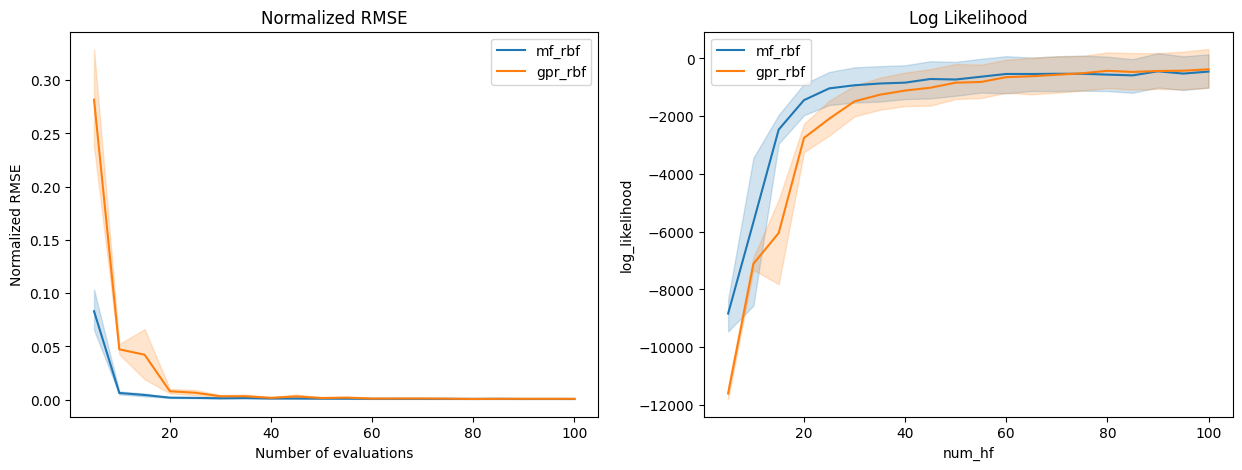

In [14]:
# plot the results of the mf_rbf_lf_200 and gpr_rbf_booth experiments using number of evaluations as x and normalized rmse and log likelihood as y
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=mf_rbf_lf_200, x="num_hf", y="normalized_rmse",
             ax=ax[0], label="mf_rbf")
sns.lineplot(data=gpr_rbf_booth, x="num_sample", y="normalized_rmse",
             ax=ax[0], label="gpr_rbf")
ax[0].set_title("Normalized RMSE")
ax[0].set_xlabel("Number of evaluations")
ax[0].set_ylabel("Normalized RMSE")
ax[0].legend()
sns.lineplot(data=mf_rbf_lf_200, x="num_hf", y="log_likelihood",
             ax=ax[1], label="mf_rbf")
sns.lineplot(data=gpr_rbf_booth, x="num_sample", y="log_likelihood",
             ax=ax[1], label="gpr_rbf")
ax[1].set_title("Log Likelihood")

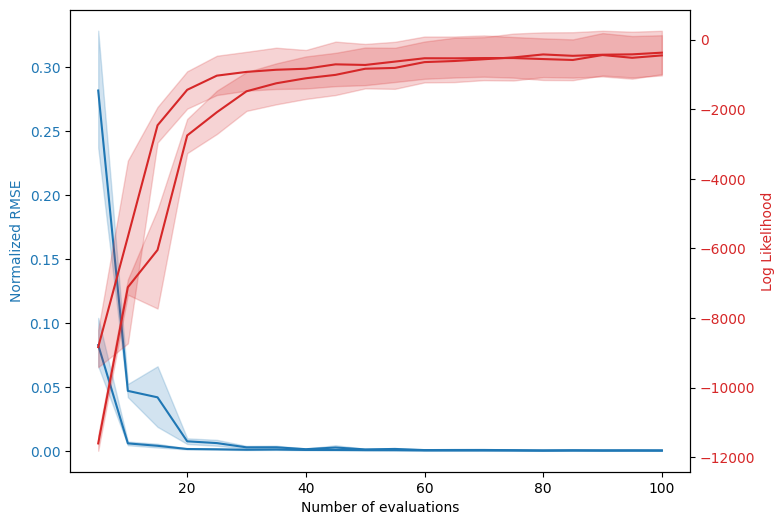

In [17]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot normalized RMSE on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of evaluations')
ax1.set_ylabel('Normalized RMSE', color=color)
sns.lineplot(data=mf_rbf_lf_200, x='num_hf',
             y='normalized_rmse', ax=ax1, color=color)
sns.lineplot(data=gpr_rbf_booth, x='num_sample',
             y='normalized_rmse', ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create another y-axis for log likelihood
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Log Likelihood', color=color)
sns.lineplot(data=gpr_rbf_booth, x='num_sample',
             y='log_likelihood', ax=ax2, color=color)
sns.lineplot(data=mf_rbf_lf_200, x='num_hf',
             y='log_likelihood', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()